In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import readNetwork as rn

#matplotlib関連
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root = root + '\..\_sampleData\Sample'
root


'c:\\Users\\tsuba\\Documents\\TNPandMS_experCode\\TNPandMS_lib\\..\\_sampleData\\Sample'

In [26]:
df = rn.read_node(root+'\\Sample_node.tntp')
df


,X,Y,;
Node,,,
1,0.0,0.0,;
2,2.0,1.0,;
3,2.0,-1.0,;
4,4.0,0.0,;


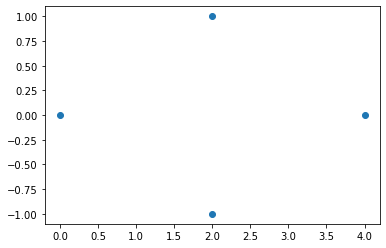

In [27]:
plt.figure()
plt.scatter(df['X'], df['Y'])

In [29]:
net = rn.read_net(root+'\\Sample_net.tntp')

In [30]:
# networkX のグラフの作り方
G = nx.DiGraph()
for i in range(net.shape[0]):
    G.add_edge(net['init_node'][i], net['term_node'][i])

# print(G.nodes)

In [31]:
# 座標リストの作成
try:
    pos = {i: [df['X'][i], df['Y'][i]] for i in df.index}  # 元データが大文字か
except KeyError:
    pos = {i: (df['x'][i], df['y'][i]) for i in df.index}  # 小文字か

# pos


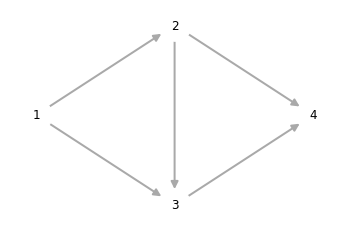

In [32]:
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure()
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=15, edge_color="darkgray", node_color="w", width=2, node_size=1000, font_size=12)
plt.axis('off')
plt.show()


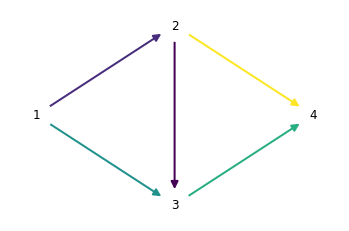

In [33]:
color = net['free_flow_time']
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure()
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=15, edge_color=color, node_color="w", width=2, node_size=1000, font_size=12)
plt.axis('off')
plt.show()
